In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd


In [2]:
import seaborn as sc
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('housing.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('median_house_value',axis=1)
Y = df['median_house_value']

xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size=0.2,random_state=42)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

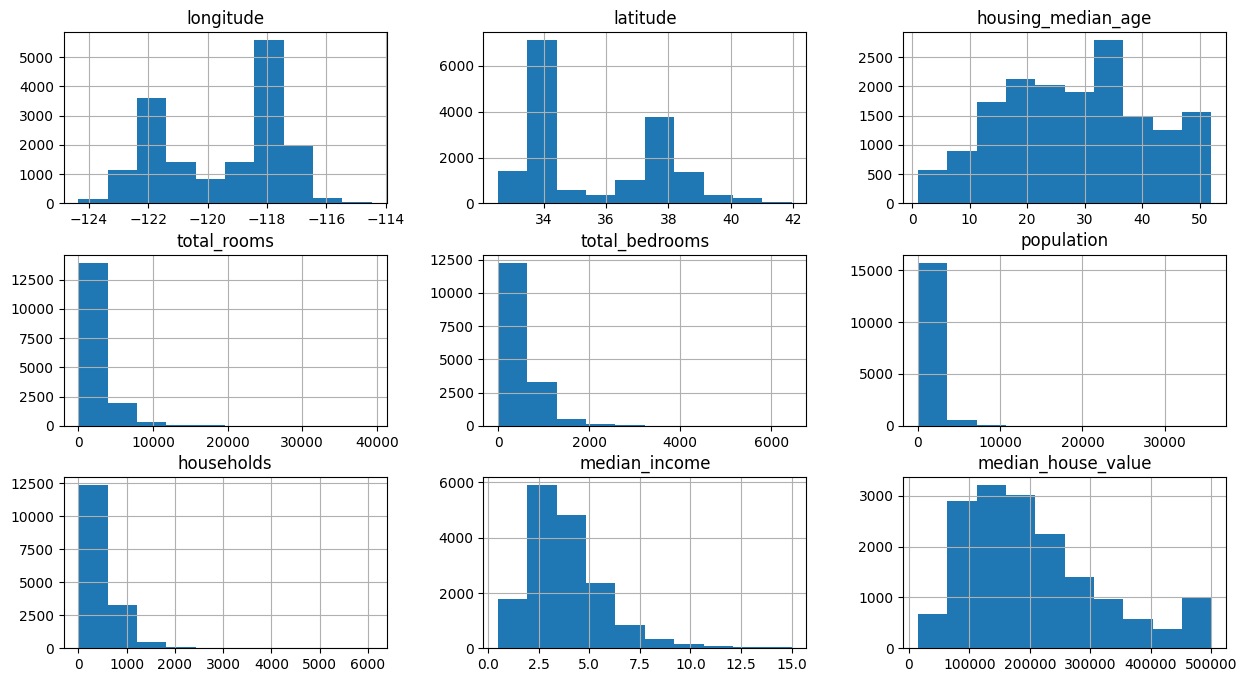

In [7]:
trainData = xTrain.join(yTrain)
trainData.hist(figsize=(15,8))

In [32]:
# trainData.drop('ocean_proximity',axis=1,inplace=True)

In [8]:
trainData.corr(numeric_only=True)

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924340           -0.106111     0.040173   
latitude            -0.924340  1.000000            0.009535    -0.033439   
housing_median_age  -0.106111  0.009535            1.000000    -0.359714   
total_rooms          0.040173 -0.033439           -0.359714     1.000000   
total_bedrooms       0.066871 -0.066337           -0.319073     0.929102   
population           0.094641 -0.106192           -0.291689     0.851704   
households           0.054023 -0.071678           -0.301818     0.916829   
median_income       -0.021911 -0.073213           -0.120550     0.202131   
median_house_value  -0.048166 -0.141933            0.104041     0.136040   

                    total_bedrooms  population  households  median_income  \
longitude                 0.066871    0.094641    0.054023      -0.021911   
latitude                 -0.066337   -0.106192   -0.071678      -0.073213   
housing_median_age       -0.319073   -0.291689   -0.301818      -0.120550   
total_rooms               0.929102    0.851704    0.916829       0.202131   
total_bedrooms            1.000000    0.872241    0.978582      -0.005364   
population                0.872241    1.000000    0.903093       0.007224   
households                0.978582    0.903093    1.000000       0.016608   
median_income            -0.005364    0.007224    0.016608       1.000000   
median_house_value        0.051352   -0.023989    0.066598       0.688695   

                    median_house_value  
longitude                    -0.048166  
latitude                     -0.141933  
housing_median_age            0.104041  
total_rooms                   0.136040  
total_bedrooms                0.051352  
population                   -0.023989  
households                    0.066598  
median_income                 0.688695  
median_house_value            1.000000

<Axes: >

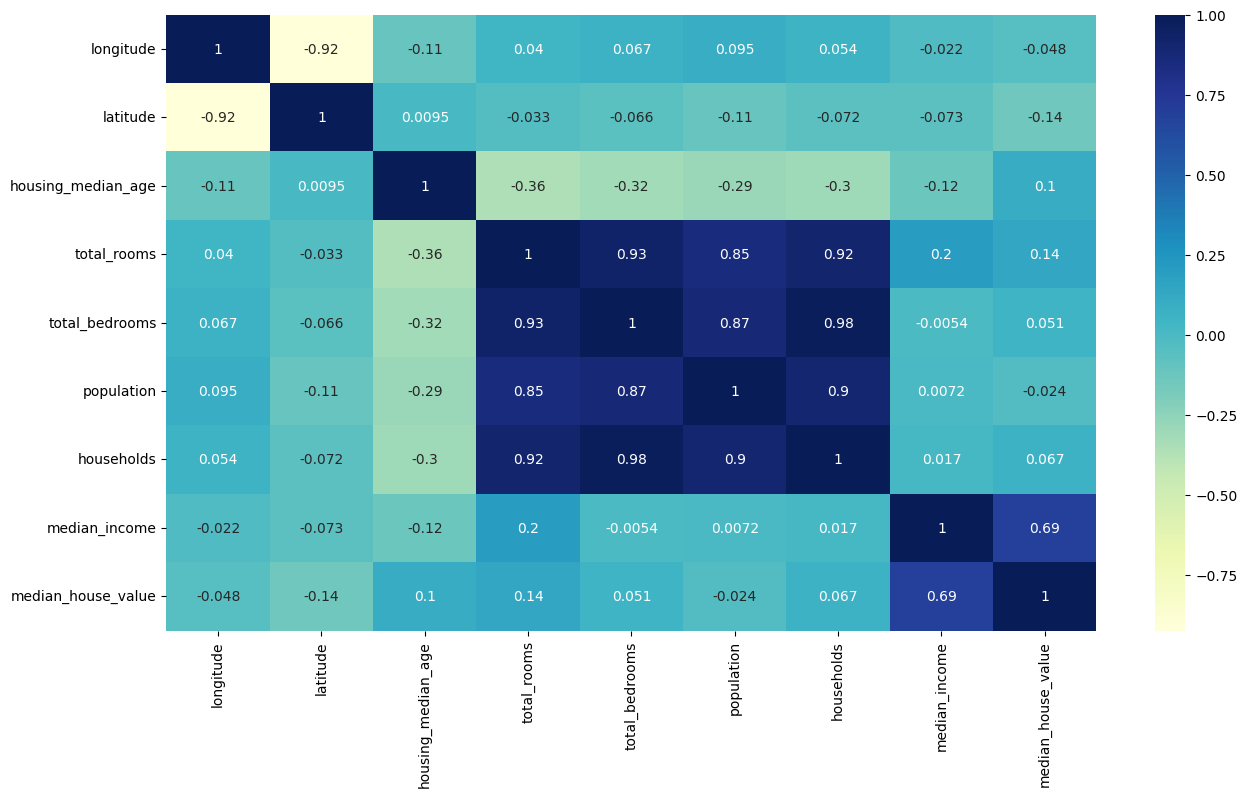

In [9]:
plt.figure(figsize=(15,8))
sc.heatmap(trainData.corr(numeric_only=True),annot=True,cmap="YlGnBu")


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

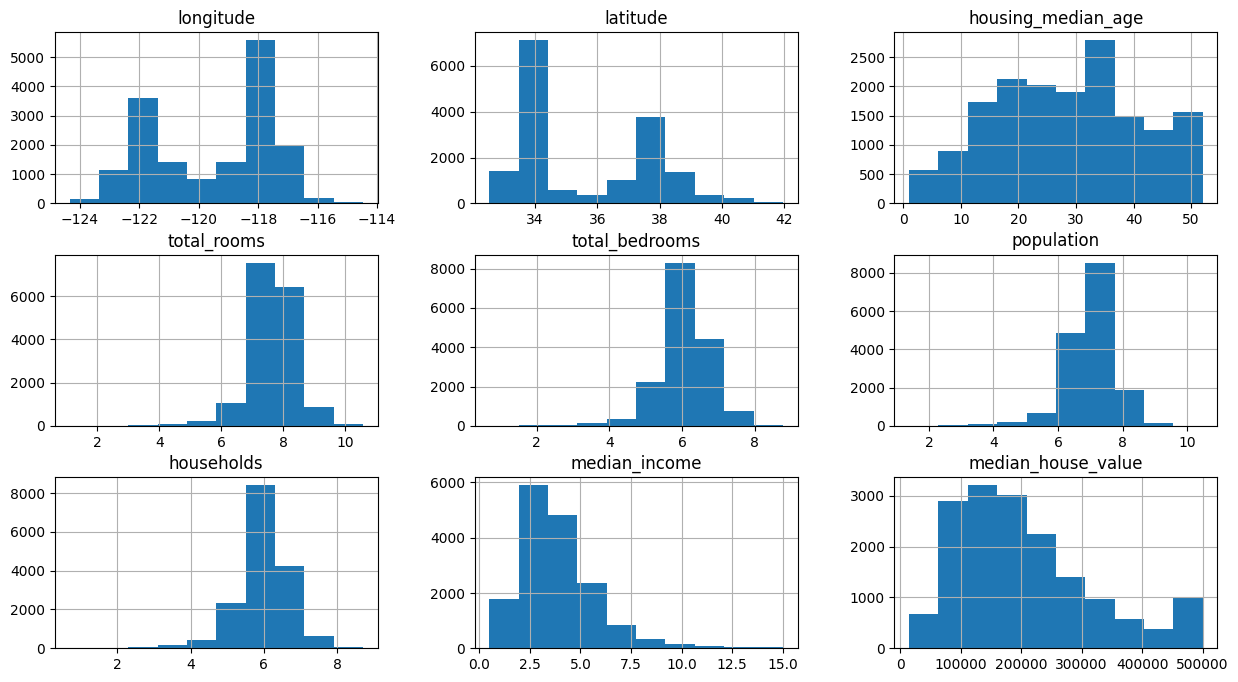

In [10]:
trainData['total_rooms'] = np.log(trainData['total_rooms']+1)
trainData['total_bedrooms'] = np.log(trainData['total_bedrooms']+1)
trainData['population'] = np.log(trainData['population']+1)
trainData['households'] = np.log(trainData['households']+1)
trainData.hist(figsize=(15,8))

In [11]:
trainData.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [12]:
trainData = trainData.join(pd.get_dummies(trainData.ocean_proximity,dtype=int))
trainData.drop('ocean_proximity',axis=1)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                14.0     8.392310        6.829794   
2057     -119.63     36.64                33.0     6.944087        5.204007   
6453     -118.06     34.12                25.0     8.266678        6.744059   
4619     -118.31     34.07                28.0     7.767687        6.856462   
15266    -117.27     33.04                27.0     7.517521        5.973810   
...          ...       ...                 ...          ...             ...   
11397    -117.97     33.72                24.0     8.003697        6.216606   
12081    -117.54     33.76                 5.0     8.673684        6.943122   
5447     -118.42     34.01                42.0     7.374629        5.913503   
866      -122.04     37.57                12.0     8.651724        6.970730   
15948    -122.43     37.73                52.0     8.189522        6.605298   

       population  households  median_income  median_house_value  <1H OCEAN  \
17727    7.900637    6.793466         4.7027            227600.0          1   
2057     6.431331    5.164786         3.4107            110400.0          0   
6453     7.522400    6.633318         3.6639            248100.0          0   
4619     7.922986    6.796824         2.2364            305600.0          1   
15266    7.172425    6.003887         3.5500            214600.0          0   
...           ...         ...            ...                 ...        ...   
11397    7.271009    6.118097         5.4286            273400.0          1   
12081    8.089176    6.909753         4.7965            160800.0          1   
5447     6.859615    5.894403         3.0990            335400.0          1   
866      8.142354    6.964136         5.2879            231200.0          0   
15948    7.727976    6.473891         3.8934            251800.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
17727       0       0         0           0  
2057        1       0         0           0  
6453        1       0         0           0  
4619        0       0         0           0  
15266       0       0         0           1  
...       ...     ...       ...         ...  
11397       0       0         0           0  
12081       0       0         0           0  
5447        0       0         0           0  
866         0       0         1           0  
15948       0       0         1           0  

[16346 rows x 14 columns]

In [13]:
trainData.drop('ocean_proximity',axis=1,inplace=True)

In [14]:
trainData

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                14.0     8.392310        6.829794   
2057     -119.63     36.64                33.0     6.944087        5.204007   
6453     -118.06     34.12                25.0     8.266678        6.744059   
4619     -118.31     34.07                28.0     7.767687        6.856462   
15266    -117.27     33.04                27.0     7.517521        5.973810   
...          ...       ...                 ...          ...             ...   
11397    -117.97     33.72                24.0     8.003697        6.216606   
12081    -117.54     33.76                 5.0     8.673684        6.943122   
5447     -118.42     34.01                42.0     7.374629        5.913503   
866      -122.04     37.57                12.0     8.651724        6.970730   
15948    -122.43     37.73                52.0     8.189522        6.605298   

       population  households  median_income  median_house_value  <1H OCEAN  \
17727    7.900637    6.793466         4.7027            227600.0          1   
2057     6.431331    5.164786         3.4107            110400.0          0   
6453     7.522400    6.633318         3.6639            248100.0          0   
4619     7.922986    6.796824         2.2364            305600.0          1   
15266    7.172425    6.003887         3.5500            214600.0          0   
...           ...         ...            ...                 ...        ...   
11397    7.271009    6.118097         5.4286            273400.0          1   
12081    8.089176    6.909753         4.7965            160800.0          1   
5447     6.859615    5.894403         3.0990            335400.0          1   
866      8.142354    6.964136         5.2879            231200.0          0   
15948    7.727976    6.473891         3.8934            251800.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
17727       0       0         0           0  
2057        1       0         0           0  
6453        1       0         0           0  
4619        0       0         0           0  
15266       0       0         0           1  
...       ...     ...       ...         ...  
11397       0       0         0           0  
12081       0       0         0           0  
5447        0       0         0           0  
866         0       0         1           0  
15948       0       0         1           0  

[16346 rows x 14 columns]

<Axes: >

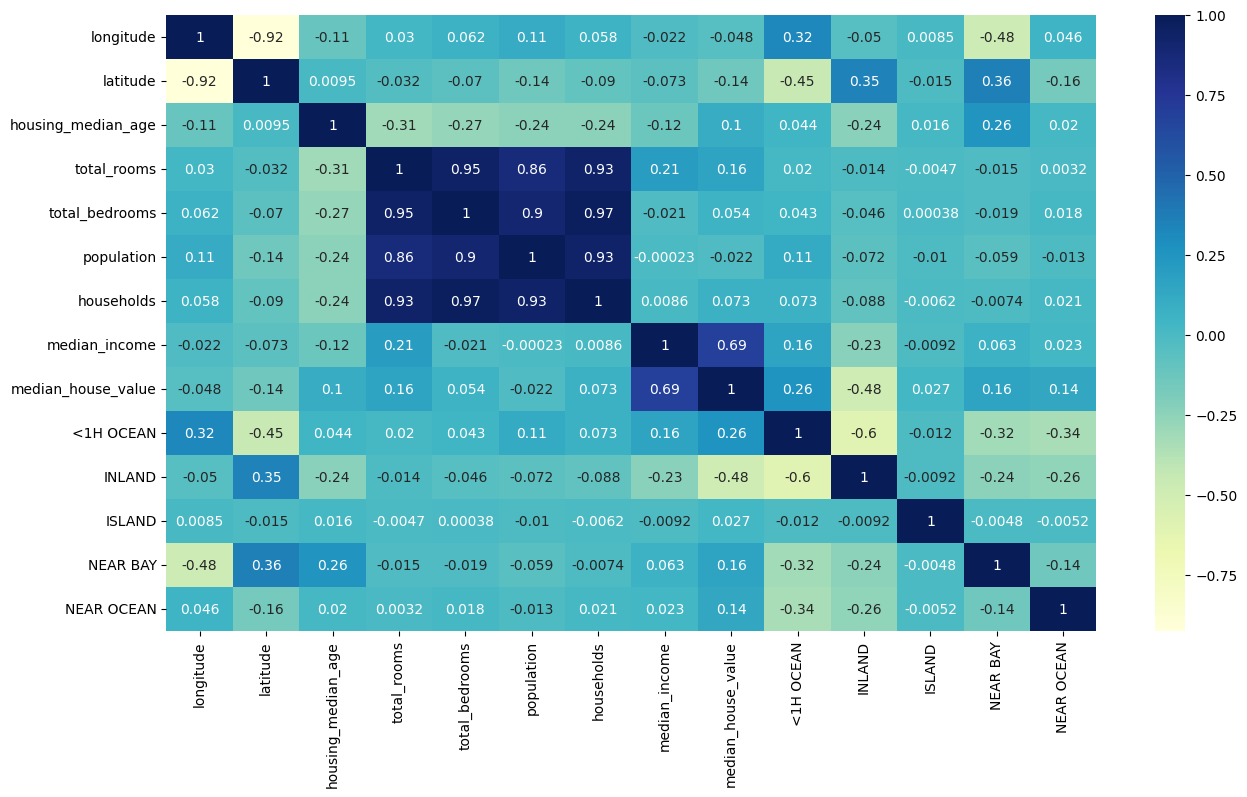

In [15]:
plt.figure(figsize=(15,8))
sc.heatmap(trainData.corr(),annot=True,cmap="YlGnBu")


<Axes: xlabel='latitude', ylabel='longitude'>

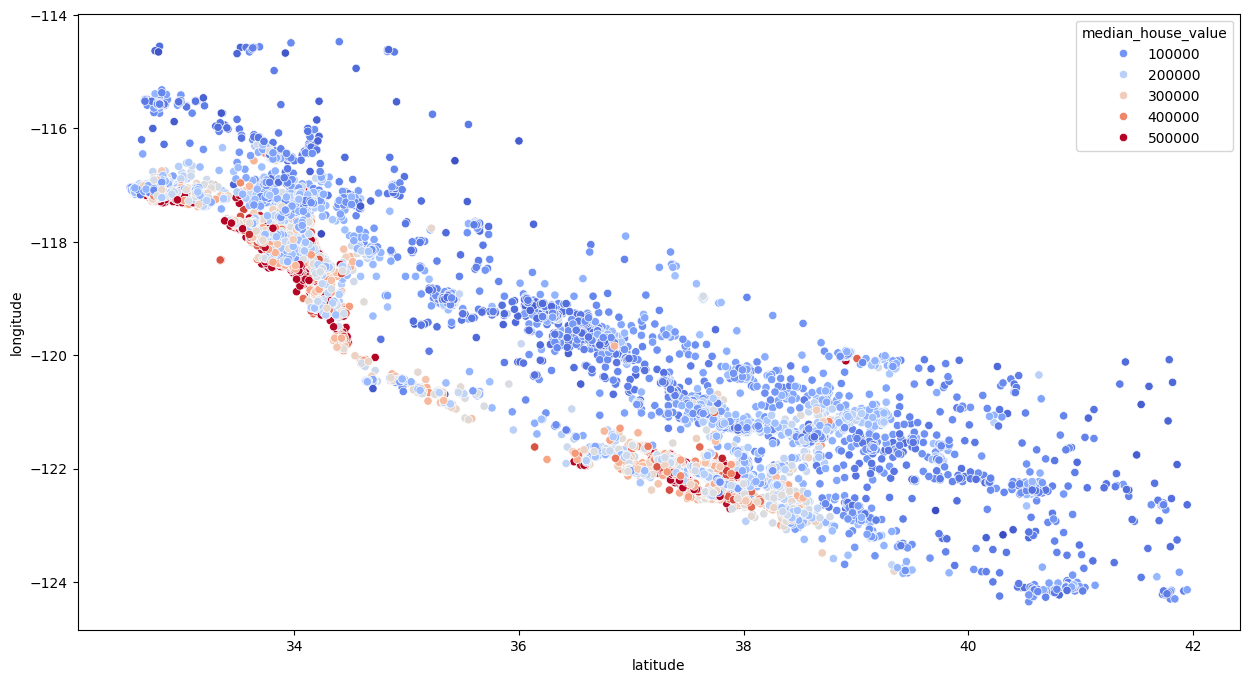

In [16]:
plt.figure(figsize=(15,8))
sc.scatterplot(x = 'latitude',y = 'longitude',data = trainData,hue = 'median_house_value',palette='coolwarm')

<Axes: >

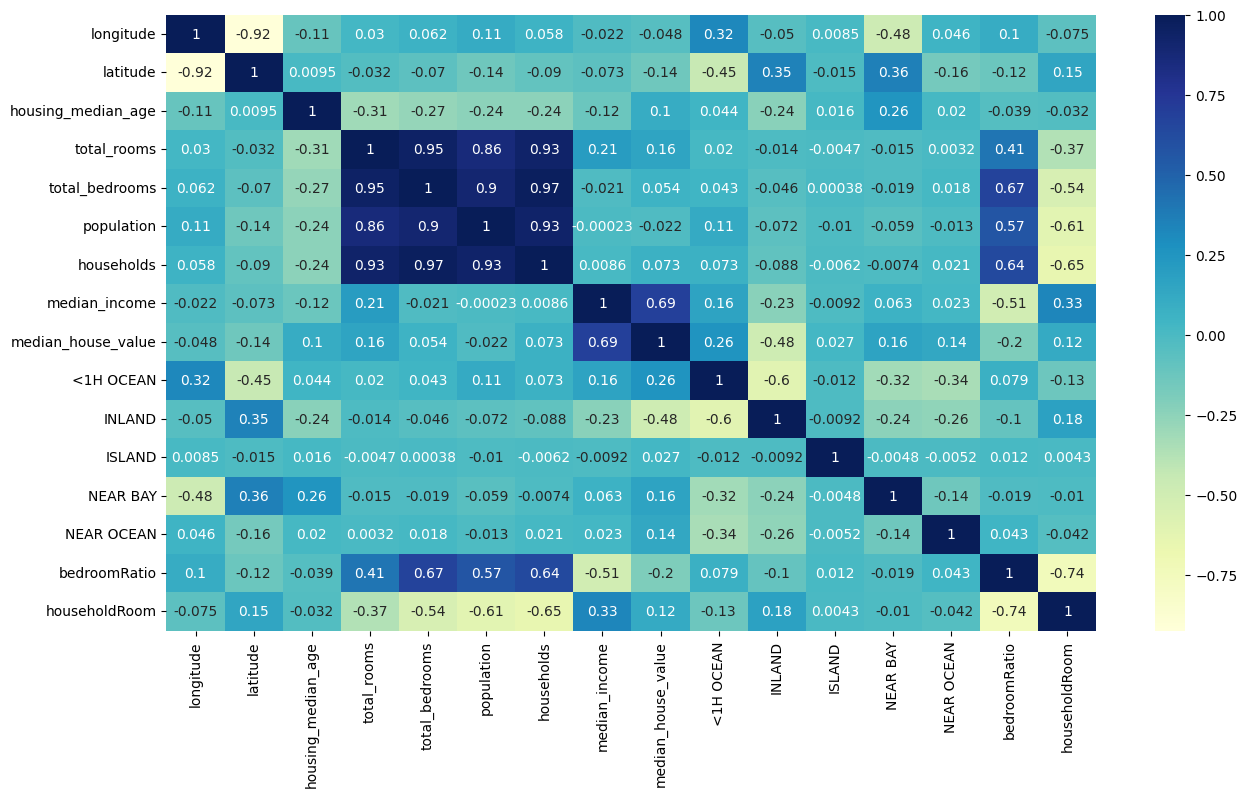

In [17]:
trainData['bedroomRatio'] = trainData['total_bedrooms'] / trainData['total_rooms']
trainData['householdRoom'] = trainData['total_rooms'] / trainData['households']
plt.figure(figsize=(15,8))
sc.heatmap(trainData.corr(),annot=True,cmap="YlGnBu")

In [18]:
xTrain,yTrain = trainData.drop(['median_house_value'],axis=1),trainData['median_house_value']
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()


In [19]:
xTrain,yTrain = np.array(xTrain),np.array(yTrain)
xTrain = scaler.fit_transform(xTrain)

In [33]:
type(xTrain)

numpy.ndarray

In [20]:
# building a ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64,activation='relu',input_shape=(xTrain.shape[1],)),
    Dense(32,activation = 'relu'),
    Dense(16,activation = 'relu'),
    Dense(8,activation = 'relu'),
    Dense(4,activation = 'relu'),
    Dense(1)
])
model.compile(optimizer = 'adam',loss = 'mse',metrics=['mae'])
model.fit(xTrain,yTrain,epochs=100)

c:\Users\Ajay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 51763884032.0000 - mae: 196075.8281
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8576447488.0000 - mae: 66446.6250
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6251308032.0000 - mae: 56839.0859
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5326102016.0000 - mae: 51878.1406
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4877614592.0000 - mae: 49490.5508
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4685717504.0000 - mae: 48453.2539
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4391264256.0000 - mae: 46607.7344
Epoch 8/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4261070848.0000 - mae: 46114.1445
Epoch 9/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4236600064.0000 - mae: 46079.9141
Epoch 10/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4214596864.0000 - mae: 45507.7070
Epoch 11/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

In [22]:
testData = xTest.join(yTest)
testData

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14416    -117.24     32.79                20.0        961.0           278.0   
16383    -121.29     38.01                 2.0       6403.0          1116.0   
7731     -118.14     33.92                31.0       3731.0           853.0   
1410     -122.07     37.94                30.0       1260.0           276.0   
1335     -121.89     37.99                 4.0       2171.0           597.0   
...          ...       ...                 ...          ...             ...   
8291     -118.15     33.76                36.0       2916.0           785.0   
6274     -117.95     34.03                33.0       1782.0           394.0   
2997     -119.03     35.32                12.0       2721.0           549.0   
13440    -117.42     34.08                28.0       2300.0           419.0   
14797    -117.10     32.57                14.0       5058.0          1299.0   

       population  households  median_income ocean_proximity  \
14416       525.0       254.0         3.1838      NEAR OCEAN   
16383      3327.0       957.0         4.4871          INLAND   
7731       2313.0       801.0         3.2237       <1H OCEAN   
1410        707.0       221.0         2.8920        NEAR BAY   
1335        928.0       461.0         4.1016          INLAND   
...           ...         ...            ...             ...   
8291       1183.0       749.0         3.5985      NEAR OCEAN   
6274       1517.0       376.0         3.3389       <1H OCEAN   
2997       1294.0       523.0         2.5575          INLAND   
13440      1312.0       444.0         3.4844          INLAND   
14797      3662.0      1193.0         2.3253      NEAR OCEAN   

       median_house_value  
14416            245800.0  
16383            137900.0  
7731             218200.0  
1410             220800.0  
1335             170500.0  
...                   ...  
8291             500001.0  
6274             157900.0  
2997             100200.0  
13440            127700.0  
14797            133700.0  

[4087 rows x 10 columns]

In [23]:
testData = testData.join(pd.get_dummies(testData.ocean_proximity,dtype=int))
testData.drop('ocean_proximity',axis=1,inplace=True)
testData['bedroomRatio'] = testData['total_bedrooms'] / testData['total_rooms']
testData['householdRoom'] = testData['total_rooms'] / testData['households']

In [24]:
testData

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14416    -117.24     32.79                20.0        961.0           278.0   
16383    -121.29     38.01                 2.0       6403.0          1116.0   
7731     -118.14     33.92                31.0       3731.0           853.0   
1410     -122.07     37.94                30.0       1260.0           276.0   
1335     -121.89     37.99                 4.0       2171.0           597.0   
...          ...       ...                 ...          ...             ...   
8291     -118.15     33.76                36.0       2916.0           785.0   
6274     -117.95     34.03                33.0       1782.0           394.0   
2997     -119.03     35.32                12.0       2721.0           549.0   
13440    -117.42     34.08                28.0       2300.0           419.0   
14797    -117.10     32.57                14.0       5058.0          1299.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
14416       525.0       254.0         3.1838            245800.0          0   
16383      3327.0       957.0         4.4871            137900.0          0   
7731       2313.0       801.0         3.2237            218200.0          1   
1410        707.0       221.0         2.8920            220800.0          0   
1335        928.0       461.0         4.1016            170500.0          0   
...           ...         ...            ...                 ...        ...   
8291       1183.0       749.0         3.5985            500001.0          0   
6274       1517.0       376.0         3.3389            157900.0          1   
2997       1294.0       523.0         2.5575            100200.0          0   
13440      1312.0       444.0         3.4844            127700.0          0   
14797      3662.0      1193.0         2.3253            133700.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  bedroomRatio  householdRoom  
14416       0       0         0           1      0.289282       3.783465  
16383       1       0         0           0      0.174293       6.690700  
7731        0       0         0           0      0.228625       4.657928  
1410        0       0         1           0      0.219048       5.701357  
1335        1       0         0           0      0.274988       4.709328  
...       ...     ...       ...         ...           ...            ...  
8291        0       0         0           1      0.269204       3.893191  
6274        0       0         0           0      0.221100       4.739362  
2997        1       0         0           0      0.201764       5.202677  
13440       1       0         0           0      0.182174       5.180180  
14797       0       0         0           1      0.256821       4.239732  

[4087 rows x 16 columns]

In [26]:
xTest,yTest = testData.drop('median_house_value',axis=1),testData['median_house_value']

xTest = scaler.fit_transform(xTest)

In [27]:
# model.evaluate(xTest,yTest)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 4186238720.0000 - mae: 44799.9180


[4201406208.0, 45300.11328125]

In [31]:
# loss, mae = model.evaluate(xTest, yTest)
# print(f"Test Mean Absolute Error: {mae}")

# Step 6: Predict new prices
predictions = model.predict(xTest[:5])
print("Predicted prices:", predictions.flatten())
print("Actual prices:", yTest[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted prices: [210305.11 156637.69 164369.92 148906.06 171853.64]
Actual prices: 14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
Name: median_house_value, dtype: float64


In [32]:
model.save('model.h5')